# Custom Filter

```SPICE``` can be used with any kind of filters as long as the transmission curve is provided. This notebook will demonstrate how to define a custom filter.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from spice.spectrum.filter import Filter
from spice.spectrum import simulate_observed_flux, AB_passband_luminosity
from spice.models import IcosphereModel
from transformer_payne import Blackbody

from jax import config
config.update('jax_platform_name', 'cpu')

In [2]:
# Define a custom filter
class CustomFilter(Filter):
    def __init__(self):
        # Define the transmission curve for the custom filter
        # This is a simple triangular filter centered at 5500 Å
        wavelengths = np.linspace(5000, 6000, 100)
        responses = np.zeros_like(wavelengths)
        responses[25:75] = np.linspace(0, 1, 50)
        responses[75:] = np.linspace(1, 0, 25)
        
        transmission_curve = np.array([wavelengths, responses])
        super().__init__(transmission_curve, name='Custom Triangular Filter')

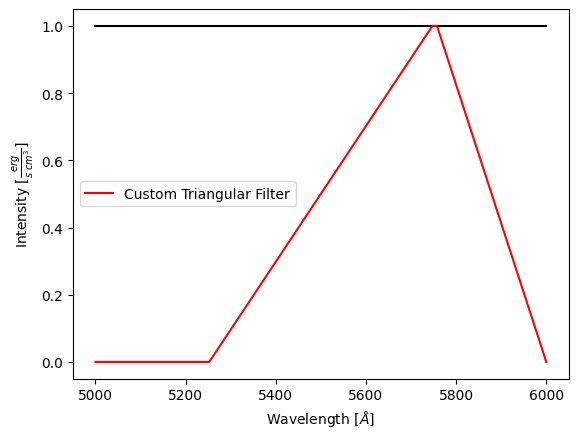

In [6]:
import matplotlib
%matplotlib inline

custom_filter = CustomFilter()
custom_filter.plot_filter_responses_for_wavelengths(np.linspace(5000, 6000, 100), np.linspace(1, 1, 100), plot_kwargs={'color': 'red'})

Let's create a very simple mesh model and simulate observed flux, as well as observed AB passband luminosities for our custom filter.

In [10]:
bb = Blackbody()
temperature = 5000  # K

m = IcosphereModel.construct(1000, 1., 1., bb.to_parameters(dict(teff=temperature)), bb.parameter_names)

/Users/mjablons/Documents/stellar-mesh-integration/src/spice/models/mesh_model.py:222: UserWarning: If override_log_g is True, either parameter_names must include one of [logg,loggs,log_g,log_gs,log g,log gs,surface gravity,surface gravities,surface_gravity,surface_gravities], or log_g_index must be passed for log g to be used in the spectrum emulator.
  warnings.warn(f"If override_log_g is True, either parameter_names must include one of [" + ",".join(


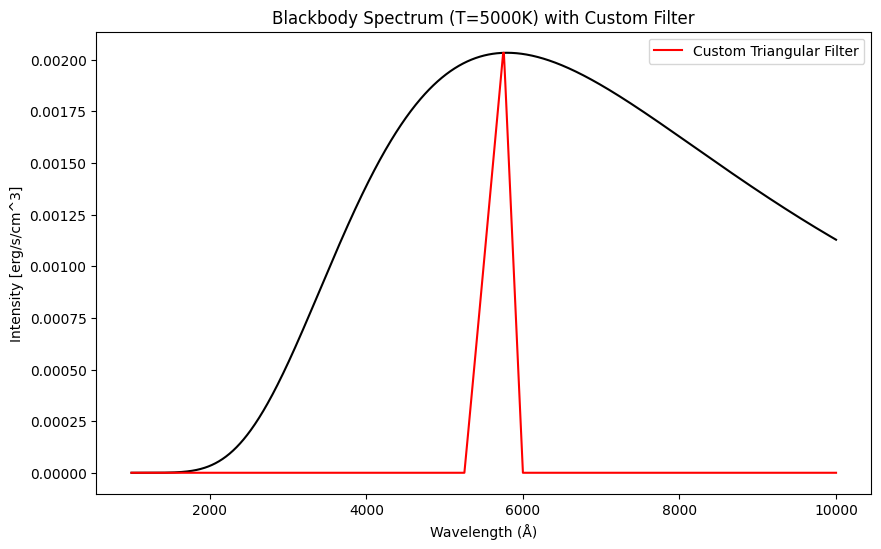

In [14]:

wavelengths = np.linspace(1000, 10000, 1000)  # Å
flux = simulate_observed_flux(bb.intensity, m, np.log10(wavelengths))

# Plot the blackbody spectrum and the filtered spectrum
plt.figure(figsize=(10, 6))
custom_filter.plot_filter_responses_for_wavelengths(wavelengths, flux[:, 0], plot_kwargs={'color': 'red'})
plt.title(f'Blackbody Spectrum (T={temperature}K) with Custom Filter')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Intensity [erg/s/cm^3]')
plt.show()


In [22]:
luminosity = AB_passband_luminosity(custom_filter, wavelengths, flux[:, 0])
print('Observed AB passband luminosity (d=10 pc): ', luminosity, 'mag')

Observed AB passband luminosity (d=10 pc):  5.5580616 mag
